In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


In [83]:
df = pd.read_csv("D:/University/third_course/MTAD/lab2/cleaned_data.csv")

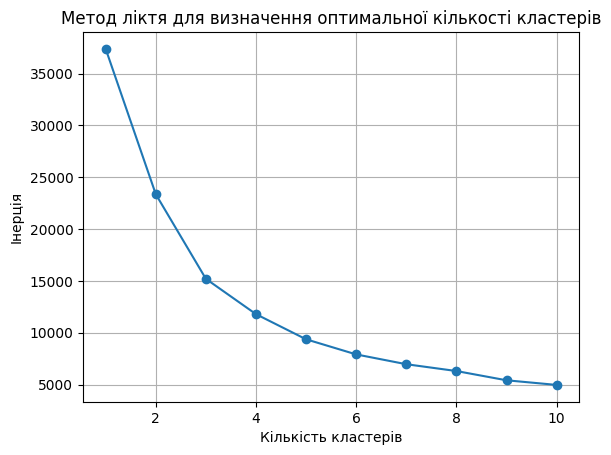

In [84]:
df.columns
# Вибір ознак
x1 = 'Danceability'
x2 = 'Loudness'
X = df[[x1, x2]]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Визначення оптимальної кількості кластерів (Метод ліктя)
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.plot(cluster_range, inertia, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()


In [85]:
# 2. Застосування K-Means з оптимальною кількістю кластерів
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_


In [86]:
# 3. Виведення центрів кластерів та кількості елементів у кожному кластері
centers = kmeans.cluster_centers_
cluster_info = pd.DataFrame(centers, columns=[x1, x2])
cluster_info['Number of elements'] = np.bincount(kmeans.labels_)
cluster_info


Danceability  Loudness  Number of elements
0     -0.784111  0.200730                7214
1      0.751494  0.248481                9853
2     -1.081673 -2.408584                1621

In [87]:
7214+9853+1621

18688

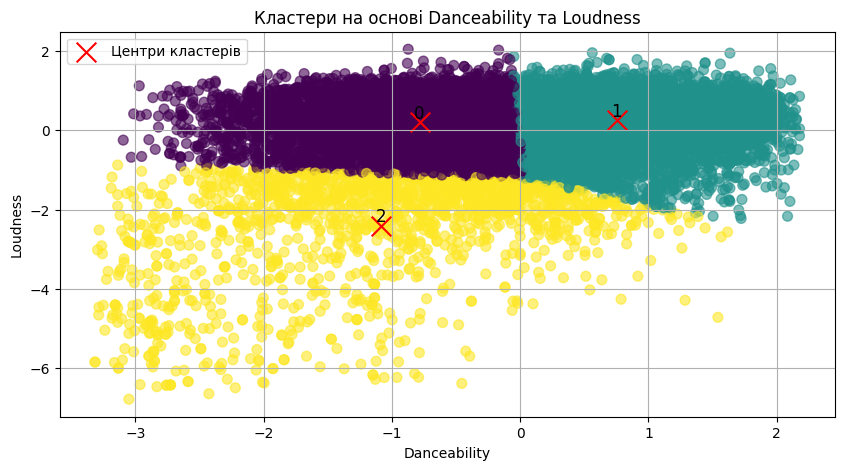

In [88]:
# 4. Візуалізація кластерів
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Центри кластерів')
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'{i}', fontsize=12, color='black', ha='center', va='bottom')
plt.title(f'Кластери на основі {x1} та {x2}')
plt.xlabel(x1)
plt.ylabel(x2)
plt.legend()
plt.grid(True)
plt.show()

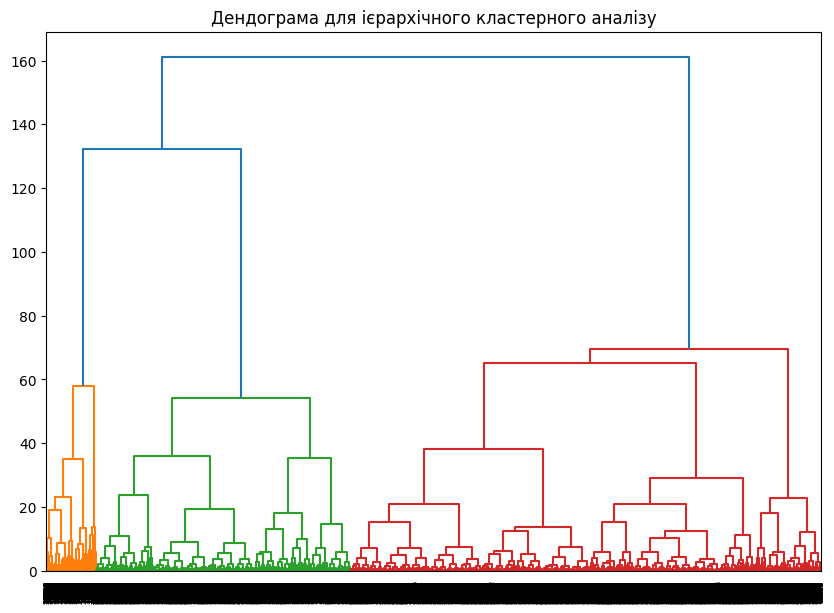

In [89]:
# Створення дендограми
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендограма для ієрархічного кластерного аналізу')
plt.show()

In [90]:
optimal_clusters_hierarchical = 3

# Ієрархічна кластеризація
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical)
df['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(X_scaled)

# Кількість елементів у кожному кластері для ієрархічної кластеризації
hierarchical_cluster_sizes = np.bincount(df['Hierarchical_Cluster'])

In [91]:
hierarchical_cluster_sizes

array([11350,  1207,  6131])

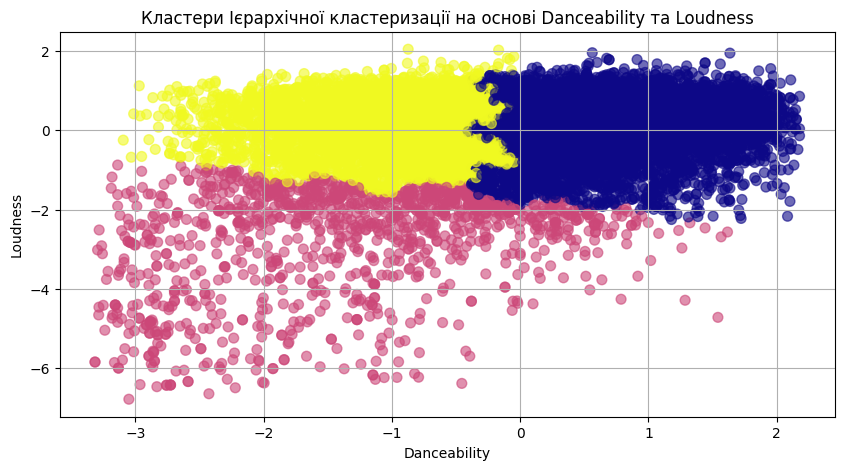

In [92]:
# Візуалізація кластерів для ієрархічної кластеризації
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Hierarchical_Cluster'], cmap='plasma', marker='o', s=50, alpha=0.6)
plt.title(f'Кластери Ієрархічної кластеризації на основі {x1} та {x2}')
plt.xlabel(f'{x1}')
plt.ylabel(f'{x2}')
plt.grid(True)
plt.show()